# Lab3.5 Training an emotion classifier with a bag-of-words

Copyright: Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

The goal of this notebook is to show how you can create a classifier that can detect emotions in conversations using the scikit-learn package. 

For the training data, we are going to use data that is produced in the MELD project. MELD stands for Multimodal Emotion Lines Dataset, which is a data set with 13,000 utterances from 1,433 dialogues from the TV-series Friends. Each utterance is annotated with emotion and sentiment labels, and encompasses audio, visual, and textual modalities. The data set is available at:  http:// affective-meld.github.io but the text part of the data has been included here in the data folder. The following paper describes the data set in detail:

S. Poria, D. Hazarika, N. Majumder, G. Naik, E. Cambria, R. Mihalcea. MELD: A Multimodal Multi-Party Dataset for Emotion Recognition in Conversation. ACL 2019: https://arxiv.org/pdf/1810.02508.pdf

We assume you have at least studied the previous notebooks in Lab3:

* Lab3.1.ml.basics
* Lab3.2.ml.evaluation

**At the end of this notebook, you will be able to**:
* load the training and test data, i.e., utterances with emotion labels
* analyse the training and test data
* represent the text as Bag-of-Words vectors
* train and evaluate a *NaiveBayes Classifier* and a *Support Vector Machine Classifier*
* save, load and apply the classifier to your own set of texts and for future use


### Table of Contents

* [Section 1: Data on utterances and emotions](#section1)
* [Section 2: Using Pandas to load data](#section2)
* [Section 3: Visualising the data](#section3)
* [Section 4: Iterating over a dataframe and getting the values we want](#section4)
* [Section 5:  Training classifiers with our data](#section5)
   * [Section 5.1: Representing the text as numerical vectors](#section5.1)
   * [Section 5.2: Representing text by the information value of the words](#section5.2)
   * [Section 5.3: Training classifiers](#section5.3)
     * [Section 5.3.1: NaiveBayes classifier](#section5.3.1)
     * [Section 5.3.2: Support Vector Machine classifier](#section5.3.2)
   * [Section 5.4: Evaluating the performance of a classifier](#section5.4)
* [Section 6: Applying classifier to your own text](#section6)




The overall procedure that we will follow is like this:

1. Load the text with emotion labels from a file and represent the data as a list of utterances and a corresponding list of labels
2. Convert the text to a vector representation so that we can mark which words occur in an utterance and which words do not. This is a Bag-of-Words representation of the text.
3. Convert the labels to a numeric representation
4. Choose a classifier model from *scikit learn*, which is a powerful machine learning package
5. Feed the classifier with the data, which needs to be numeric
6. Test the classifier on the test set, which should be represented in a similar way as the training data
7. Report the test results


## 1. Data on utterances and emotions  <a class="anchor" id ="section1"></a> 

We want to train a classifier or machine-learning module with examples of utterances that have been labeled for the emotion that is expressed.
The first step is to get the training data. The training data we are using for detection emotions in text are taken from the following Github repository:

https://github.com/declare-lab/MELD

The MELD project created this data for multimodal emotion detection in conversations using facial, audio and textual signals. Here we are only going to use the textual data. For convenience, the textual data are also provided in this Lab in the 'data/MELD' folder:

* dev_sent_emo.csv
* test_sent_emo.csv
* train_sent_emoc.csv

These files are text files in the so-called CSV format (Comma Separated Values), hence the extension ".csv".

When running this notebook, you can browse to the file and open it by double cliking on it. The file 'train_sent_emoc.csv' will open in a new TAB which looks as follows:

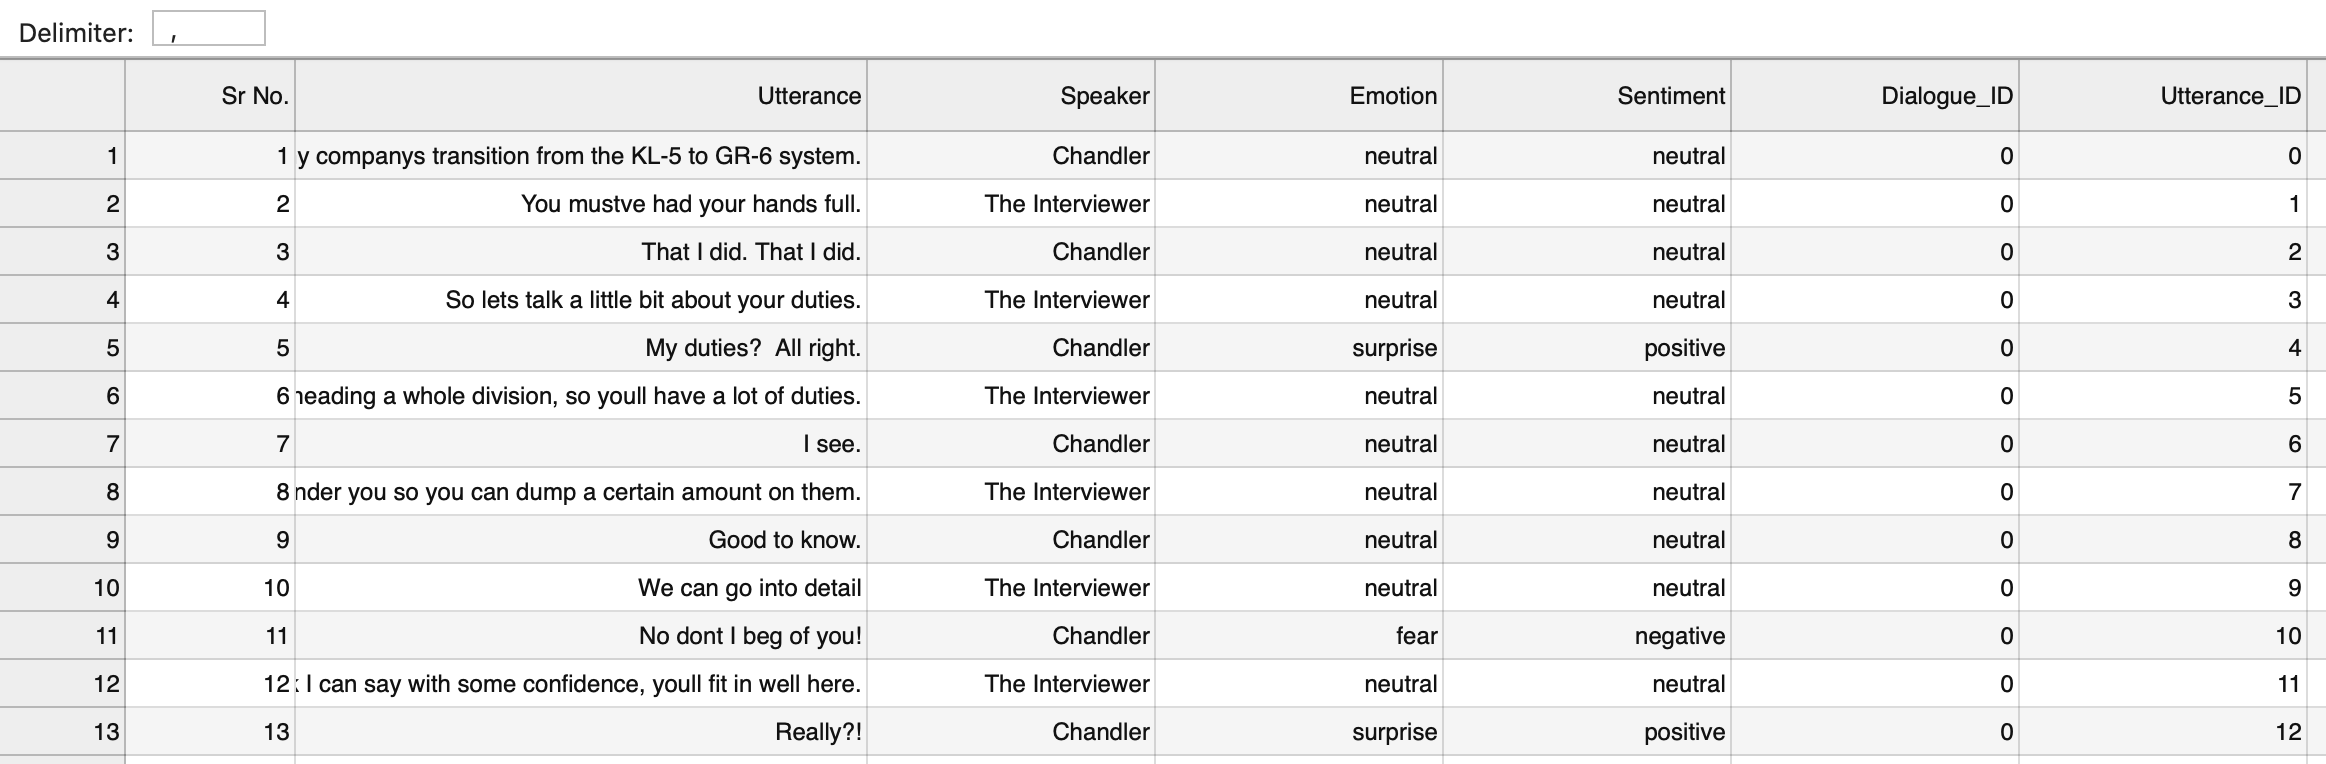

The first line shows the header. You see that the rows and columns with the data are indeed separated by the delimiter ",". You can scroll through the table as in a file editor or spread sheet. CSV files can also be opened in other programs such as Excel and you can save excel files to CSV.

Opening a CSV. file in a notebook is a nice way to quickly get an idea about the content. We can see that there is a column with the utterances and columns for the emotion and the sentiment as annotations. We want to use the utterances and emotion columns for training a classifier to detect the emotion in any utterance. There are other columns as well, but we will ignore these in this notebook.

## 2. Using Pandas to load data <a class="anchor" id ="section2"></a> 

Instead of opening the data file in another TAB in Jupyter notebook, we want to read the data from the file in *memory* in the current notebook and feed it to the learning machine. The CSV file is a text file that you can read as any other text file. You could read it line by line and parse the columns to get the data. However, there is a very powerful package for loading data called `Pandas`  https://pandas.pydata.org, which we are going to use. Eventually, you may want to follow a tutorial on the web on how to use Pandas but for now you can simply follow the instructions below.

Note that Pandas can be tricky when loading your own data. Be aware of that.

Pandas needs to be installed separately on your local machine first. You need to install it from the command line outside this notebook. As with other packages, make sure you install it within the same environment that you used to install Anaconda. Please install pandas locally from the command line, using either of the two following instructions:

* >`conda install pandas`
* >`python -m pip install --upgrade pandas`

If the installation was succesful, you can now import 'pandas' in this notebook. If Jupyter notebook does not know 'pandas', try restarting the kernel or even restarting Jupyter notebook.

In [1]:
import pandas as pd

If there is no error, you imported pandas and created the instantiation 'pd'. We can now use 'pandas' functions and data elements through the variable 'pd'. Take your time to study the next bit of code so that you understand the individual steps.
 
Our input file is located in the 'data/MELD' folder within this lab folder. We can therefore define the path to this file relative to this notebook. Next, we use the 'pd.read_csv' function to read the data from the file. This read function returns a so-called Dataframe object, which is the object that holds all the data in memory for further processing. We are going to assign this object as a value to the variable 'dftrain'.

In [2]:
# Path to the training data
filepath = './data/MELD/train_sent_emo.csv'

# Create a dataframe object 'dftrain' by readig the file.
dftrain = pd.read_csv(filepath)

### The data has some problematic strings with encoding problems. The next code removes some of these from the utterances
# Fixing encoding problems and replacing the 'Utterance' columns with the cleaned strings
dftrain['Utterance'] = dftrain['Utterance'].str.replace("\x92|\x97|\x91|\x93|\x94|\x85", "'")

# We print out the first cell in the 'Utterance' column to inspect it.
dftrain['Utterance'][0]

/Users/piek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


"also I was the point person on my company's transition from the KL-5 to GR-6 system."

There are two useful functions to inspect data in a dataframe. The 'dftrain.info()' function gives us a technical overview of all the data, showing the columns names and order, the number of cells with values per column (non-null) and the data type per column. There are 9989 indexed rows and all cells have values. The 'dftrain.head()' function shows the content for head of the table. You can pass in a number for the range of rows you want to see. Here we look at the first ten.

In [3]:
dftrain.info()
dftrain.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company's tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must've had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let's talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
5,6,"Now you'll be heading a whole division, so you...",The Interviewer,neutral,neutral,0,5,8,21,"00:16:41,126","00:16:44,337"
6,7,I see.,Chandler,neutral,neutral,0,6,8,21,"00:16:48,800","00:16:51,886"
7,8,But there'll be perhaps 30 people under you so...,The Interviewer,neutral,neutral,0,7,8,21,"00:16:48,800","00:16:54,514"
8,9,Good to know.,Chandler,neutral,neutral,0,8,8,21,"00:16:59,477","00:17:00,478"
9,10,We can go into detail,The Interviewer,neutral,neutral,0,9,8,21,"00:17:00,478","00:17:02,719"


In a similar way, we can also inspect the tail.

In [4]:
dftrain.tail(10)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
9979,10469,How many perfectly fine women are you gonna re...,Monica,surprise,negative,1038,8,2,3,"00:00:28,319","00:00:32,573"
9980,10470,"Hold it, hold it.",Joey,neutral,neutral,1038,9,2,3,"0:00:32,824","0:00:33,456"
9981,10471,I gotta side with Chandler on this one.,Joey,neutral,neutral,1038,10,2,3,"0:00:33,456","0:00:35,556"
9982,10472,"When I first moved to the city, I went out a c...",Joey,disgust,negative,1038,11,2,3,"00:00:35,744","00:00:44,334"
9983,10473,It made me nuts.,Joey,disgust,negative,1038,12,2,3,"00:00:45,462","00:00:46,587"
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274"
9988,10478,"That was a good one. For a second there, I was...",Joey,joy,positive,1038,17,2,3,"00:01:08,401","00:01:12,071"


The MELD project also provides a test set, which has the same format as the training set. We are going to load this data as well in a different data frame with the name 'dftest'.

In [5]:
filepath = './data/MELD/test_sent_emo.csv'
dftest = pd.read_csv(filepath)

dftest['Utterance'] = dftest['Utterance'].str.replace("\x92|\x97|\x91|\x93|\x94|\x85", "'")
dftest.info()
dftest.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        2610 non-null   int64 
 1   Utterance     2610 non-null   object
 2   Speaker       2610 non-null   object
 3   Emotion       2610 non-null   object
 4   Sentiment     2610 non-null   object
 5   Dialogue_ID   2610 non-null   int64 
 6   Utterance_ID  2610 non-null   int64 
 7   Season        2610 non-null   int64 
 8   Episode       2610 non-null   int64 
 9   StartTime     2610 non-null   object
 10  EndTime       2610 non-null   object
dtypes: int64(5), object(6)
memory usage: 224.4+ KB


/Users/piek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all you're coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. That's so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"
5,21,"Push 'em out, push 'em out, harder, harder.",Joey,joy,positive,1,2,1,23,"00:10:46,979","00:10:50,148"
6,22,"Push 'em out, push 'em out, way out!",Joey,joy,positive,1,3,1,23,"00:10:50,316","00:10:52,609"
7,23,"Let's get that ball and really move, hey, hey,...",Joey,joy,positive,1,4,1,23,"00:10:52,777","00:10:55,612"
8,24,"Let's' I was just'yeah, right.",Joey,joy,positive,1,5,1,23,"00:10:55,780","00:11:01,242"
9,25,Push!,Joey,joy,positive,1,6,1,23,"0:11:01,410","0:11:01,828"


## 3. Visualising the data <a class="anchor" id ="section3"></a> 

There are many ways and packages for visualising the data. Data visualisation is important because it may show biases or inspire baseline approaches. Data biases can make your system overfit to certain dominant classes and make it hard to detect rare cases. A baseline system is a solid and simple approach against which you want to compare your trained system. Possible baselines are to assign random classes as output or to always assign the most dominant class. Let's see what is the dominant class in our data. Don't worry too much about the next code. It is more for fun.

For visualising our data, we are using the matplotlib package, which we instantiate as 'plt'.

In [6]:
import matplotlib.pyplot as plt

There are many options and functions you can use. We will show only a few here. First of all, you can set the size of figure that is used for the visualisation.

In [7]:
plot_size = plt.rcParams["figure.figsize"]
print('This is the default size:')
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 10
plot_size[1] = 8
print('We change it now to:')
print(plot_size[0]) 
print(plot_size[1])

plt.rcParams["figure.figsize"] = plot_size 

This is the default size:
6.0
4.0
We change it now to:
10
8


The dataframe function 'value_counts()' gives the statistics on the values for a column. You can use it on any column in your data and we use it here to get the stats for the *Emotion* column and next use the matplotlib plot function to show as a pie-chart.

<AxesSubplot:ylabel='Emotion'>

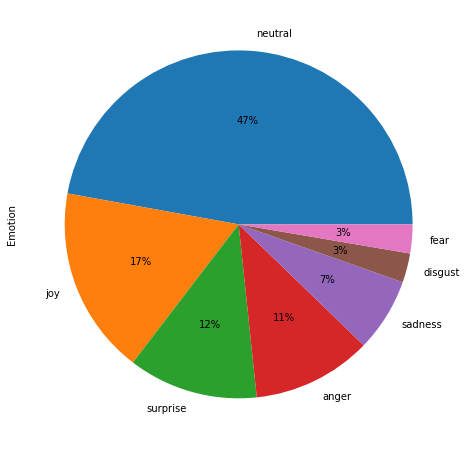

In [8]:
### Selection the Emotion columns, counting the values and plotting it as a 'pie chart'
dftrain.Emotion.value_counts().plot(kind='pie', autopct='%1.0f%%')

We can also get information on the distribution over the speakers:

<AxesSubplot:ylabel='Speaker'>

/Users/piek/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/piek/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


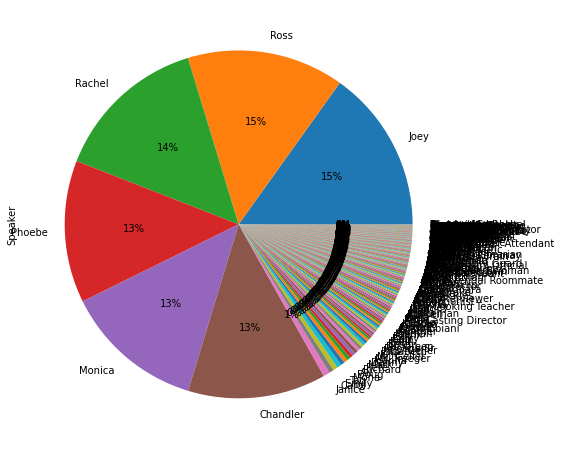

In [9]:
### Selection the Emotion columns, counting the values and plotting it as a 'pie chart'
dftrain.Speaker.value_counts().plot(kind='pie', autopct='%1.0f%%')

Instead of a pie-chart, you can also use other visualisations such as a bar chart.

<AxesSubplot:>

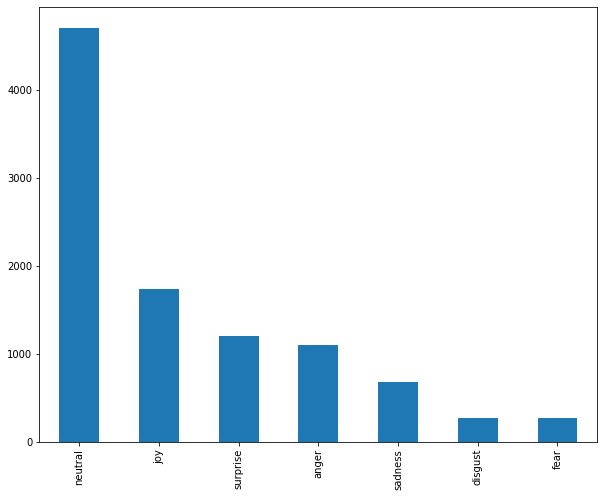

In [10]:
dftrain.Emotion.value_counts().sort_values(ascending=False).plot(kind='bar')

The visualisations show that 'neutral' is by far the dominant class in our training data and 'fear' as a label occurs the least. On the basis of these stats, we can already make our expectation for what a machine will learn from this data: *assign the class 'neutral'!*

A possible baseline would be to always assign 'neutral'. We will try that below.

Lets see if the test data has a similar distribution:

<AxesSubplot:ylabel='Emotion'>

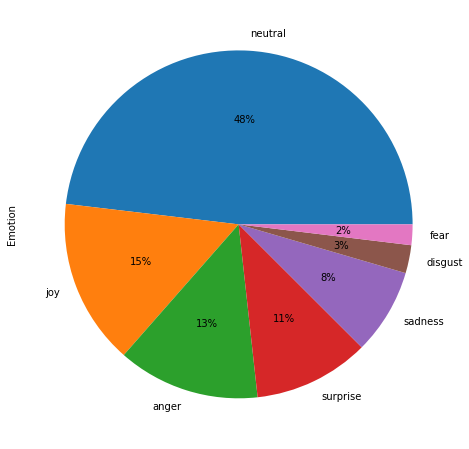

In [11]:
dftest.Emotion.value_counts().plot(kind='pie', autopct='%1.0f%%')

We see that the test data is similar in terms of the distribution of emotions. This means that statistical expectations learned from the training data will be relevant for the test data. A 'neutral' baseline, always assigning the class neutral, will be correct in 48% of the cases.

Think about this for a moment. Is this good or bad? For science or for applications?

## 4. Iterating over a dataframe and getting the values we want <a class="anchor" id ="section3"></a> 

Instead of obtaining statistics and visualisations, we want to process the data row by row to get the values we need. In our case the utterances and the labels. The next *for*-loop shows you how you can iterate over a specific data segment, in this case the column 'Utterance', and how you can get the *index* number for the row and the value assigned to the variable *utterance*. The Python function *enumerate* converts the column 'Utterance' into an iterable object so that we get the index number and the value, together.

We *break* the *for*-loop when the index number equals "10". 

In [12]:
for index, utterance in enumerate(dftrain['Utterance']):
    print(index, utterance)
    if index==10:
        break

0 also I was the point person on my company's transition from the KL-5 to GR-6 system.
1 You must've had your hands full.
2 That I did. That I did.
3 So let's talk a little bit about your duties.
4 My duties?  All right.
5 Now you'll be heading a whole division, so you'll have a lot of duties.
6 I see.
7 But there'll be perhaps 30 people under you so you can dump a certain amount on them.
8 Good to know.
9 We can go into detail
10 No don't I beg of you!


We see the indexes *0* to *10* and followed by the utterances from these rows. Using the index number, we can also get the Emotion label from the corresponding row. This is done by passing the index value to the *iloc* data structure.

In [13]:
for index, utterance in enumerate(dftrain['Utterance']):
    emotion_label = dftrain['Emotion'].iloc[index]
    print(index, utterance,emotion_label) 
    if index==10:
        break

0 also I was the point person on my company's transition from the KL-5 to GR-6 system. neutral
1 You must've had your hands full. neutral
2 That I did. That I did. neutral
3 So let's talk a little bit about your duties. neutral
4 My duties?  All right. surprise
5 Now you'll be heading a whole division, so you'll have a lot of duties. neutral
6 I see. neutral
7 But there'll be perhaps 30 people under you so you can dump a certain amount on them. neutral
8 Good to know. neutral
9 We can go into detail neutral
10 No don't I beg of you! fear


We can see that most of our utterances are *neutral* but we also have one *surprise* and one *fear*. We will use the above *for*-loop to create the data for training a classifier.

## 5. Training classifiers with our data <a class="anchor" id ="section5"></a> 

To train our classifier, we are going to use the *sklearn* and *numpy* packages. We also are going to filter the text for stopwords that we take from *NLTK*. We further need one specific function from *sklearn* that does all the work for us: *CountVectorizer*. This function can read a list of sentences and create a so-called Bag-of-Words vector representation. See the notebook *Lab3.1.ml.basic.ipynb* for the details.

We first import the necessary packages. This is the toolkit with which you are going to work:

In [14]:
import sklearn
import numpy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In order to feed *CountVectorizer* with the texts, we need to iterate over the utterances in Pandas dataframe and put them in a list.

In [15]:
training_instances=[]
for utterance in dftrain['Utterance']:
    ### If you have performance issues you can break the loop after 2000 instances to have less data
    #if index==2000:
    #    break
    training_instances.append(utterance)

### print the length of our list to see if al data are loaded
print(len(training_instances))

9989


We now have a list of utterances and a list of corresponding labels in the same order. We can inspect each of them:

In [16]:
print(training_instances[10])

No don't I beg of you!


To train the machine, we also need a list of labels in the same order that corresponds with the utterances. We create a similar loop for the labels.

In [17]:
training_labels = []
for label in dftrain['Emotion']:
    ### We break the loop after 2000 instances 
    #if index==2000:
    #    break
    training_labels.append(label)
#### Check if we have the same number of labels
print(len(training_labels))

9989


The label for the 11th utterance: *training_instances[10]* can now be retrieved from the list of labels:

In [18]:
print(training_instances[0:10], training_labels[0:10])

["also I was the point person on my company's transition from the KL-5 to GR-6 system.", "You must've had your hands full.", 'That I did. That I did.', "So let's talk a little bit about your duties.", 'My duties?  All right.', "Now you'll be heading a whole division, so you'll have a lot of duties.", 'I see.', "But there'll be perhaps 30 people under you so you can dump a certain amount on them.", 'Good to know.', 'We can go into detail'] ['neutral', 'neutral', 'neutral', 'neutral', 'surprise', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']


Obviously, the lists of texts and labels should be of the same length and in the same order.

In a similar way, we will iterate over the test dataframe and get the utterances and labels for testing.

In [19]:
### the first loop gets the utterances
test_instances = []
for utterance in dftest['Utterance']:
    test_instances.append(utterance)

### We use the same loop for the list of emotion labels that correspond with the vector representations of each utterance
test_labels = []
for label in dftest['Emotion']:
    test_labels.append(label)

print(test_instances[0:10], test_labels[0:10])
print(len(test_instances))
print(len(test_labels))

["Why do all you're coffee mugs have numbers on the bottom?", "Oh. That's so Monica can keep track. That way if one on them is missing, she can be like, 'Where's number 27?!'", "Y'know what?", 'Come on, Lydia, you can do it.', 'Push!', "Push 'em out, push 'em out, harder, harder.", "Push 'em out, push 'em out, way out!", "Let's get that ball and really move, hey, hey, ho, ho.", "Let's'  I was just'yeah, right.", 'Push!'] ['surprise', 'anger', 'neutral', 'neutral', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy']
2610
2610


Since the machine learning packages can only handle digital data for efficiency, we need to convert the text and the labels to numerical representations. We are going to explain this in the next section.

### 5.1 Representing the text as numerical vectors <a class="anchor" id ="section5.1"></a> 

*Machines don't like words, they eat numbers.*

*Sklearn* has a powerful function *CountVectorizer* that takes a lists of texts and converts these into a vector representation with numbers. We have explained the basics of this function in notebook: *Lab3.1.ml.basics.ipynb*. Summarising, the function creates a vector with slots that correspond with the words in the total data set. Each position in the vector represents a word. If the word is present in an utterance then that position is turned to '1'. Positions of words that are not present in the utterance keep the value '0'. So if the data set has a total of 1,000 unique words, our vector will have 1,000 slots. Each utterance can be represented by this vector by switching the positions for its words to '1' and keeping the other values as '0'. You can imagine what the size of a vector will be for a data set with hundreds of thousands of text. Luckily, machines can deal with this type of data very well.

When vectors represent a complete set of features but only encode presence of a single feature in data input, they are called *one-hot-encodings*, i.e. each position encodes whether a feature is present or not. In the case of a bag-of-words presentation, a vector can have several positive values for an utterance. Each text is thus represented by the '1' values in the complete vector.

If you want to know more about *one-hot-encodings* of features, you can check out the notebooks:

* Lab3.8.ml.nerc.linguistics_features
* Lab3.9.ml.nerc.embeddings

There are a few parameters that can be set for the CountVectorizer function to determine the words that are represented in the vector. The most important ones are:

* how often does the word occur in the data set
* how to split the text into separate words
* which stop words need to be excluded

Below, we set the minimal frequency to '5', so we ignore words occurring less frequently. We als ignore stopwords as defined by the NLTK library. Finally, we use NLTK to split the text into a list of tokens.

To get an idea what these parameters do, you can experiment with the values and check the impact.

In [20]:
# Turn utterances train data into a vector 
frequency_threshold = 5
utterance_vec =CountVectorizer(min_df=frequency_threshold, # If a token appears fewer times than this, across all documents, it will be ignored
                             tokenizer=nltk.word_tokenize, # we use the nltk tokenizer
                             stop_words=stopwords.words('english')) # stopwords are removed

## If you do not want to remove stopwords use the next call instead
#utterance_vec =CountVectorizer(min_df=frequency_threshold,tokenizer=nltk.word_tokenize) 



We now created an instance of the CountVectorizer *utterance_vec* with the settings as defined. We can now call the functions of CountVectorizer on this instance. The *fit_transform* function will do two things:

<ol>
<li> it will create a dictionary with all unique tokenized words and generate a vector with the length of the number of unique words, such that each position corresponds with a unique word
<li> it will transform the list of text sentences to bag-of-words vector representations
</ol>


In [21]:
training_count_vectors = utterance_vec.fit_transform(training_instances)

/Users/piek/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


We have now created a vector representation *training_count_vectors* of the vocabulary of the full data set for words occurring 5 times or more. Every position in this vector represents a unique word token.

In [22]:
#Total number of word features or the length of the total vector
print(len(utterance_vec.vocabulary_))

1101


The length of the *vocabulary_* property indicates the length of the lexicon and therefore the length of the vectors or the number of feature dimensions.

We can get the *names* of the positions in the vector using the function *get_feature_names*. Below we show the first 50 names.

In [23]:
# First 50 feature names
print(list(utterance_vec.get_feature_names())[:50])

['!', '$', "'", "''", "'cause", "'d", "'em", "'kay", "'ll", "'m", "'re", "'s", "'ve", '(', ',', '--', '.', '..', '...', '10', '2', '25', '30', '40', '7', '8', ':', ';', '?', '``', 'able', 'absolutely', 'accident', 'across', 'actor', 'actual', 'actually', 'age', 'ago', 'ah', 'ahh', 'air', 'alan', 'almost', 'alone', 'along', 'already', 'alright', 'also', 'although']


We can also get the position of a specific word using the function *vocabylary_get*:

In [24]:
# 'husband' is found in the corpus, mapped to index 489
utterance_vec.vocabulary_.get('husband')

475

Our data are this a list of vectors which represents a matrix with the text vectors on each row. Using *shape*, we can get the dimensions of the matrix:

In [25]:
print(training_count_vectors.shape)

(9989, 1101)


This means we have a list of *9989* vectors, each with the length of the size of the vocabulary, if the threshold is set to frequency 5 this is *1103* positions for words. If you change the frequency threshold the number of columns changes as well.

We can convert the *utterance_counts* matrix to an array and get the first element and look at the vector values for slots 100 till 1000:

In [26]:
print(training_count_vectors.toarray()[1][100:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

We can see that most values are zero's and just a few have the value 1. This is what we call a *sparse vector*. A large collection of texts, usually results in large and sparse vectors with most values set to '0' and a few to '1' for each texts.

Depending on the settings of the CountVectorizer (frequency threshold, stopwords filtered), the vector will be bigger or smaller. Try to change these settings and see what the effect is on the vector.

Think about this representation for a moment.

### 5.2 Representing text by the information value of the words <a class="anchor" id ="section5.2"></a> 

As we have seen in the previous notebook *Lab3.1.ml.basics.ipynb*, we can also transform the counts into information value scores using the *TfidfTransformer* function.

The shape remains the same but the values are now scores between zero and one.

In [27]:
# Convert raw frequency counts into TF-IDF values
tfidf_transformer = TfidfTransformer()
training_tfidf_vectors = tfidf_transformer.fit_transform(training_count_vectors)

In [28]:
# Same dimensions, now with tf-idf values instead of raw frequency counts
print(training_tfidf_vectors.shape)
print(training_tfidf_vectors.toarray()[1][10:1000])

(9989, 1101)
[0.         0.         0.34658335 0.         0.         0.
 0.11385102 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

We see that values '1' are now differentiated into real numbers or floats that represents not only presence but also the information value of the word.

Think about these values for this data set. The texts are short and there may not be a topical distribution for these utterances that represent chats. Is *TF.IDF* really useful for this data set? We will see below by building different classifiers and testing their performance. 

### 5.3 Representing the test data as numeric values <a class="anchor" id ="section5.3"></a> 

We presented the training data as Bag-of-Word vectors but now we also need to  fit the test data to this Bag-of-Word model. Note that the representation of the text data needs to be compatible with the training data. So this means that the vector for representing the test data has the same length and the same positions as the training data.

Words in the test data that do not occur in the training data can therefore not be represented in these vectors. Instead of *fit_transform*, we therefore use the function *transform* for the instance *utterance_vec* that we shaped with the training data. The *transform* function will represent the text according to the vector model of the training data.

In [29]:
test_count_vectors = utterance_vec.transform(test_instances)
print(test_count_vectors.shape)
print(test_count_vectors.toarray()[1][10:1000])

(2610, 1101)
[0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0

We can see that the test data has vectors of the same lengths with many zeros and a few position scores one. There are as many vectors as test utterances.

We can use the same transformer we used before to turn the count vectors into weighted vectors:

In [30]:
test_tfidf_vectors = tfidf_transformer.fit_transform(test_count_vectors)

In [31]:
print(test_tfidf_vectors.toarray()[1][10:1000])

[0.         0.33858007 0.         0.         0.20712297 0.
 0.19367711 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.14032542 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### 5.4 Representing labels as numeric values <a class="anchor" id ="section5.4"></a> 

Since machine learning algorithms have been designed to work with numeric data, we also convert the class labels to numeric valies. Note that this is not strictly necessary. As you have seen in previous notebooks, you can also use string labels. However, some of the evaluation reporting functions give an error for non-numerical labels. This is why we convert the labels to index values. The sklearn package has a utility function *preprocessing* to convert the string labels to numerical values.

In [32]:
training_labels[0:10]

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'surprise',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral']

In [33]:
from sklearn import preprocessing

# first we instantiate a label encode
label_encoder = preprocessing.LabelEncoder()
# we feed this encoder with the complete list of labels from our data, both the training and test labels
label_encoder.fit(training_labels+test_labels)
print(list(label_encoder.classes_))


['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']


We can see that we 7 different labels. We need to convert this list to numeric values raning from '0' to '6'. We use the *transform* function to do this.

In [34]:
training_classes = label_encoder.transform(training_labels)
print(list(training_classes[0:20]))
test_classes = label_encoder.transform(test_labels)
print(list(test_classes[0:20]))

[4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 2, 4, 6, 4, 6, 5, 6, 2, 4, 4]
[6, 0, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 6, 0, 0, 0, 3, 3]


Now we have numeric representations of our texts and numeric representations of our labels. We can feed these data to a classifier that is inlcuded in sklearn.

### 5.3 Training classifiers <a class="anchor" id ="section5.3"></a> 

We can now use the above data representation as training data to build a classifier. We are going to use two different classifiers for demonstration purposes. Do not worry about what the differences are between these two classifiers. This will be explained in more detail in the machine learning for NLP course.

The first classifier is a Naive Bayes classifier. This is a so-called generative model that tries to predict the words that are most likely for each class, in our case emotions. The association between emotion and each word is independent. So it is a very simple association relation. Naive Bayes classifiers can be useful of you have little data to train and the association is not very complex, e.g. associating a positive or negative sentiment with a text. If you cannot wait for the machine learning course and want to learn more, you can check out this tutorial: https://web.stanford.edu/class/cs124/lec/naivebayes.pdf.

The second classifiers is a Support Vector Machine or SVM. This is a more sophisticated model that belongs to the family of discriminative models. This means it learns a weight for each feature (in our case words) to predict the right class (in our case an emotion). SVMs typically try to find the right separation between negative and positive examples for the feauture words by adjusting the weights: all wrong ones on one side and right ones on the other side.

Again if you cannot wait for the machine learning course and want to learn more, you can check out another tutorial: https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In NLP, SVM classifiers have shown to perform very well for many tasks.

#### 5.3.1 Naive Bayes classifier <a class="anchor" id ="section5.3.1"></a> 

First, we are going to use a simple Naive Bayes classifier to train a model. Because we have multiple labels, we need a multinomial classifier as we are dealing with *7* classes or emotions.

In [35]:
# Now ready to build a classifier. 
# We will use Multinominal Naive Bayes as our model
from sklearn.naive_bayes import MultinomialNB

The *fit* function of sklearn is the function we use to train the model and it takes as input the training data and the labels.

In [36]:
# Train a Multimoda Naive Bayes classifier
mn_nb_clf = MultinomialNB().fit(training_tfidf_vectors, training_classes)


After training the classifier, we can apply it to test data that is represented in the same way. For this we use the function *predict*

In [37]:
# Predicting the Test set results, find macro recall
y_pred_nb = mn_nb_clf.predict(test_tfidf_vectors)

The predictions are a list of numeric values that represent the emotions. The values are listed in the order of the test data.

In [38]:
print('Predictions from the NB classifer', y_pred_nb)

Predictions from the NB classifer [4 4 4 ... 4 4 4]


#### 5.3.2 Support Vector Machine classifier <a class="anchor" id ="section5.3.2"></a> 

You can easily choose another classifier in sklearn and feed it with exactly the same data. We next are going to use a Support Vector Machine classifier, which was one of the most effective classifiers before the Deep Learning paradignm.

In [39]:
from sklearn import svm

svm_linear_clf = svm.LinearSVC(max_iter=2000)

svm_linear_clf.fit(training_tfidf_vectors, training_classes)


LinearSVC(max_iter=2000)

In [40]:
# Predicting the Test set results, find macro recall
y_pred_svm = svm_linear_clf.predict(test_tfidf_vectors)

In [41]:
print('Predictions from the SVM classifier', y_pred_svm)

Predictions from the SVM classifier [4 4 4 ... 0 4 4]


### 5.4 Evaluating the performance of a classifier <a class="anchor" id ="section5.4"></a> 

Sklearn provides functions to obtain the recall, precision and f-measure for the test set that we split of from the training data. To do this, we only need to provide the true values of the test set and the list of predicted values and pass it to the *sklearn.metrics* functions to compute the precision, recall and f-score. You can see in the functions below that these functions have parameters for *y_true*, *y_pred* and the way of averaging. We pass *y_test*, which is the list of emotions from the data set, as the value for *y_true*, and we pass *pred_nb* as the list of emotions that is predicted by the NaiveBayes classifier as a value for *y_pred*. We choose *micro_averaging* to aggregate the scores from the different emotions.

In [42]:
nb_micro_recall= sklearn.metrics.recall_score(y_true=test_classes,
                             y_pred=y_pred_nb,
                             average='micro')


print('NB recall', nb_micro_recall)

NB recall 0.5486590038314176


We can see here that the NB classifier has an average recall of 0.54, which is not very good.

We can make a similar call for the predictions from the SVM classifier by assigning the values *y_pred_svm* to the parameter *y_pred*.

In [43]:
svm_micro_recall= sklearn.metrics.recall_score(y_true=test_classes,
                             y_pred=y_pred_svm,
                             average='micro')

print('SVM recall', svm_micro_recall)

SVM recall 0.5727969348659003


The SVM scores a little bit higher but still not good enough. Remember that a baseline that alwaus would assign the label **nutral** would score .48.

Let's see what the precision and f-scores are. For this we replace *recall_score* with *precision_score* and *f1_score* respectively.

In [44]:
nb_micro_precision= sklearn.metrics.precision_score(y_true=test_classes,
                             y_pred=y_pred_nb,
                             average='micro')

svm_micro_precision= sklearn.metrics.precision_score(y_true=test_classes,
                             y_pred=y_pred_svm,
                             average='micro')

print('NB precision', nb_micro_precision)
print('SVM precision', svm_micro_precision)

NB precision 0.5486590038314176
SVM precision 0.5727969348659003


In [45]:
nb_micro_f_score= sklearn.metrics.f1_score(y_true=test_classes,
                             y_pred=y_pred_nb,
                             average='micro')
svm_micro_f_score= sklearn.metrics.f1_score(y_true=test_classes,
                             y_pred=y_pred_svm,
                             average='micro')

print('NB f-score', nb_micro_f_score)
print('SVM f-score', svm_micro_f_score)

NB f-score 0.5486590038314176
SVM f-score 0.5727969348659003


Recall, precision and f1 scores are the same. Let's see what happens if we use *macro averaging*.

In [46]:
nb_macro_f_score= sklearn.metrics.f1_score(y_true=test_classes,
                             y_pred=y_pred_nb,
                             average='macro')
svm_macro_f_score= sklearn.metrics.f1_score(y_true=test_classes,
                             y_pred=y_pred_svm,
                             average='macro')

print('NB f-score', nb_macro_f_score)
print('SVM f-score', svm_macro_f_score)

NB f-score 0.22609954773151714
SVM f-score 0.30910132430911147


Why is the macro average score so much lower than the micro average score? Think about the distribution of the emotions labels.

Instead of the averaged results, sklearn can also generate a report per model

In [47]:
from sklearn.metrics import classification_report

report = classification_report(test_classes,y_pred_nb,digits = 7)
print(label_encoder.classes_)
print('BoW TFIDF NB  ----------------------------------------------------------------')
print('Word freqeuncy threshold', frequency_threshold)
print(report)

print('Confusion matrix')
print(sklearn.metrics.confusion_matrix(test_classes,y_pred_nb))

report = classification_report(test_classes,y_pred_svm,digits = 7)
print(label_encoder.classes_)
print('BoW TFIDF SVM LINEAR ----------------------------------------------------------------')
print('Word freqeuncy threshold', frequency_threshold)

print(report)

print('Confusion matrix')
print(sklearn.metrics.confusion_matrix(test_classes,y_pred_svm))

['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'surprise']
BoW TFIDF NB  ----------------------------------------------------------------
Word freqeuncy threshold 5
              precision    recall  f1-score   support

           0  0.5000000 0.0550725 0.0992167       345
           1  0.0000000 0.0000000 0.0000000        68
           2  0.0000000 0.0000000 0.0000000        50
           3  0.4471545 0.2736318 0.3395062       402
           4  0.5508820 0.9697452 0.7026247      1256
           5  0.6666667 0.0096154 0.0189573       208
           6  0.7410714 0.2953737 0.4223919       281

    accuracy                      0.5486590      2610
   macro avg  0.4151106 0.2290627 0.2260995      2610
weighted avg  0.5329776 0.5486590 0.4505146      2610

Confusion matrix
[[  19    0    0   46  264    0   16]
 [   2    0    0    7   56    0    3]
 [   1    0    0    4   44    1    0]
 [   3    0    0  110  283    0    6]
 [   4    0    0   33 1218    0    1]
 [   4    0    0   15  184

/Users/piek/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see that the performance varies a lot across the emotions and across the classifiers. E.g. *anger* and *surprise* have highest precision for NB but not for SVM. SVM has for most emotions a higher recall and the averaged results and the f1 scores are higher for SVM.

We can also inspect the least and most important features per category.

In [48]:
def important_features_per_class(vectorizer,classifier,n=20): #n is the number of top features
    class_labels = label_encoder.classes_
    feature_names =vectorizer.get_feature_names()
    #['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
    topn_anger = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_disgust= sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]
    topn_fear = sorted(zip(classifier.feature_count_[2], feature_names),reverse=True)[:n]
    topn_joy = sorted(zip(classifier.feature_count_[3], feature_names),reverse=True)[:n]
    topn_neutral = sorted(zip(classifier.feature_count_[4], feature_names),reverse=True)[:n]
    topn_sad = sorted(zip(classifier.feature_count_[5], feature_names),reverse=True)[:n]
    topn_surprise = sorted(zip(classifier.feature_count_[6], feature_names),reverse=True)[:n]
    print("Important words in anger utterances")
    for coef, feat in topn_anger:
        print(class_labels[0], coef, feat)
    print("-----------------------------------------")
    print("Important words in disgust utterances")
    for coef, feat in topn_disgust:
        print(class_labels[1], coef, feat) 
    print("-----------------------------------------")
    print("Important words in fear utterances")
    for coef, feat in topn_fear:
        print(class_labels[2], coef, feat)
    print("-----------------------------------------")
    print("Important words in joy utterances")
    for coef, feat in topn_joy:
        print(class_labels[3], coef, feat) 

    print("-----------------------------------------")
    print("Important words in neutral utterances")
    for coef, feat in topn_neutral:
        print(class_labels[4], coef, feat) 

    print("-----------------------------------------")
    print("Important words in sad utterances")
    for coef, feat in topn_sad:
        print(class_labels[5], coef, feat) 

    print("-----------------------------------------")
    print("Important words in surprise utterances")
    for coef, feat in topn_surprise:
        print(class_labels[6], coef, feat) 

In [49]:
print('Most important features per emotion for the NB classifier')
important_features_per_class(utterance_vec, mn_nb_clf)

Most important features per emotion for the NB classifier
Important words in anger utterances
anger 223.03235788149902 !
anger 94.69290923403523 ,
anger 70.28273671369536 ?
anger 59.2434159191618 .
anger 56.883075620694676 n't
anger 43.51156336266137 's
anger 26.706543732692694 'm
anger 24.75619570312513 oh
anger 23.283163396714986 get
anger 21.64564394719183 're
anger 21.505531175869343 okay
anger 19.0066126150504 well
anger 18.918465091646354 ca
anger 18.309019492921106 hey
anger 18.111738953014292 go
anger 17.321152291735633 right
anger 17.23331923262424 know
anger 16.56547891571762 come
anger 15.760710007952403 na
anger 15.745865379408833 ross
-----------------------------------------
Important words in disgust utterances
disgust 34.128655444953274 !
disgust 28.91327488234763 .
disgust 28.81134368187575 ,
disgust 15.490611685171187 's
disgust 14.12122849043827 ?
disgust 12.097714478065466 oh
disgust 10.275472204818177 n't
disgust 8.74921140582924 're
disgust 6.45474504119803 yeah
d

Take your time to look at these features and think about their meaning in relation to the emotions.

Such a feature analysis can be very useful for improving the classifier. You can easily see that certain features are not very distriminative or predictive for the correct emotion because they score high for all different emotions.

Think a few more minutes about different ways to improve the features.

Unfortunately, we cannot apply this simple function to our SVM classifier as it does not come with the function *feature_count_*. Therefore we have to create another tailored function for this model. 

We have to make a separate function that calibrates the scores of the SVM classifier. You do not need to understand the details of this code but have a look at the output.

In [50]:
from sklearn.calibration import CalibratedClassifierCV

def average_importances(model):
    coef_avg = 0
    for classifier in model.calibrated_classifiers_:
        coef_avg = coef_avg + classifier.base_estimator.coef_
        
    coef_avg  = coef_avg/len(model.calibrated_classifiers_)
    return coef_avg

def f_importances(importances, names, n=20):
    class_labels = label_encoder.classes_
    
    for num, imp in enumerate(importances):
        emotion = class_labels[num]
        topn = sorted(zip(imp,names), reverse=True)[:n]
        
        print("Important words in {} utterances".format(emotion))
        for coef, feat in topn:
            print(emotion, coef, feat)
        print("-----------------------------------------")

Before we can extract the weighted features, we need to callibrate the classifier and fit it again on the data.

In [51]:
from sklearn.calibration import CalibratedClassifierCV

linear_model = svm.LinearSVC(max_iter=2000)
svm_linear_clf = CalibratedClassifierCV(linear_model , method='sigmoid', cv=10)

svm_linear_clf.fit(training_tfidf_vectors, training_classes)


print('Most important features per emotion for the SVM classifier')
feature_names = utterance_vec.get_feature_names()
importances = average_importances(svm_linear_clf)
f_importances(importances, feature_names)

Most important features per emotion for the SVM classifier
Important words in anger utterances
anger 1.5760070558222752 killed
anger 1.4208187976612845 bitch
anger 1.3801402236764284 calm
anger 1.366744875873671 script
anger 1.3584053078116387 mad
anger 1.351604259384463 easier
anger 1.326820598708912 worst
anger 1.3210980095613134 crap
anger 1.3137466947616976 instead
anger 1.2699091347711198 inappropriate
anger 1.2404273679676365 ended
anger 1.230618886390592 choice
anger 1.2266022000170222 relationship
anger 1.2013453060572432 bastard
anger 1.1546005448884928 hung
anger 1.1486303915253748 damnit
anger 1.1264038603802462 started
anger 1.1221983599921344 leg
anger 1.0755148804895196 suck
anger 1.0738452287745213 mike
-----------------------------------------
Important words in disgust utterances
disgust 1.5772283744021571 spend
disgust 1.5503947177008224 hate
disgust 1.4876779191155776 boat
disgust 1.3894585968053845 pig
disgust 1.3199958022387928 evil
disgust 1.2147427016060297 ugh
d

You can see that these features make much more sense, which is in line with the better performance of the model.

## 6. Applying a classifier to your own text

Now we can apply our classifier to new data. We represent our text as a list of sentences. You can see it is easy to make up your own text or to load it from a file.

In [52]:
# some utterances
some_chat = ['That is sweet of you', 
               'You are so funny', 
               'Are you a man or a woman?', 
               'Chatbots make me sad and feel lonely.', 
               'Your are stupid and boring.', 
               'Two thumbs up', 
               'I fell asleep halfway through this conversation', 
               'Wow, I am really amazed.', 
               'You are amazing.',
             'I feel so low being in isolation',
             'People dumping waste are horrible',
             'Its awful that you cannot stop smoking',
             'Dogs scare me',
             'I am afraid I will get sick at work',
             'I run away when I see a dog',
             'When do you start your job?'
            ]


len(some_chat)

16

Next, we define the list of labels that go with our chat.

In [53]:
some_chat_emotions = ['joy', 'joy', 'neutral', 'sadness', 'anger', 'joy', 'anger', 'surprise', 'joy', 'sadness', 'disgust', 'disgust', 'fear', 'fear', 'fear', 'neutral']

We use the LabelEncoder *label_encoder* to convert this list into a numpy array with digits:

In [54]:
print('labels',label_encoder.classes_)
some_chat_labels = label_encoder.transform(some_chat_emotions)
print(some_chat_labels)

labels ['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'surprise']
[3 3 4 5 0 3 0 6 3 5 1 1 2 2 2 4]


It is important to realise that our classifier is trained with words as features that are derived from the training data. Our data may contain words that do not occur in the training data. Remember that we created large vectors. 

To be able to apply our model to these text, we need to represent the text using the same vectors as we used for training the model. The sklearn transformer function does this work for you.

In [55]:
# We re-use utterance_vec to transform it in the same way as the training data
new_counts = utterance_vec.transform(some_chat)
new_counts.shape

(16, 1101)

Note that words in our new utterances that are NOT in the training data, will not be represented as there are no slots in the vectors from the training data.

In [56]:
# we compute tf idf values
some_chat_tfidf = tfidf_transformer.transform(new_counts)
some_chat_tfidf.shape

(16, 1101)

In [57]:
# have classifier make a prediction
some_chat_pred = svm_linear_clf.predict(some_chat_tfidf)

In [58]:
# print out results ()
for review, predicted_label in zip(some_chat, some_chat_pred):
    
    print('%s => %s' % (review, 
                        label_encoder.classes_[predicted_label]))

That is sweet of you => joy
You are so funny => neutral
Are you a man or a woman? => neutral
Chatbots make me sad and feel lonely. => neutral
Your are stupid and boring. => neutral
Two thumbs up => neutral
I fell asleep halfway through this conversation => neutral
Wow, I am really amazed. => surprise
You are amazing. => joy
I feel so low being in isolation => neutral
People dumping waste are horrible => neutral
Its awful that you cannot stop smoking => neutral
Dogs scare me => neutral
I am afraid I will get sick at work => neutral
I run away when I see a dog => neutral
When do you start your job? => neutral


We now have a list of the our chat utterances and the labels but we do not know how sure the classifier is for each output. In order to get these probabilities, we need to use the function predict_proba. This is what it generates:

In [59]:
some_chat_pred_probabilities = svm_linear_clf.predict_proba(some_chat_tfidf)
print(some_chat_pred_probabilities)

[[0.03251161 0.01685141 0.01204911 0.67449444 0.20061469 0.04801588
  0.01546285]
 [0.13175414 0.01714384 0.03909398 0.33216797 0.43000284 0.01150088
  0.03833634]
 [0.20180189 0.03961561 0.01891448 0.0728836  0.37440298 0.05016922
  0.24221222]
 [0.053735   0.02964125 0.01548253 0.22121038 0.3414637  0.30418681
  0.03428033]
 [0.32232492 0.04079928 0.02393234 0.02709623 0.4308739  0.15087284
  0.0041005 ]
 [0.06341167 0.0246402  0.01289196 0.14445579 0.6472716  0.06477595
  0.04255282]
 [0.19587165 0.01483822 0.01349794 0.05934541 0.63601489 0.0239594
  0.0564725 ]
 [0.02234324 0.00859495 0.01656928 0.10134463 0.04437398 0.0326058
  0.77416811]
 [0.02090533 0.01248286 0.01659646 0.80134243 0.09652787 0.04523788
  0.00690716]
 [0.09725348 0.02857136 0.02202107 0.11776569 0.59640264 0.12723666
  0.0107491 ]
 [0.1274823  0.02042    0.01938752 0.1245392  0.58966237 0.02808371
  0.0904249 ]
 [0.2427025  0.01108363 0.02751825 0.12615793 0.50054009 0.0865031
  0.0054945 ]
 [0.09177385 0.0216

We now see a list of 7 scores for each utterance. These 7 scores correspond with the scores of comparing each emotion with all the others as a comparison. So the first number is for anger, the second for disgust, etc. in the order of our list of emotions. Using Pandas we can nicely visualise the results.

In [60]:
some_chat_pred_labels = []
for predicted_label in some_chat_pred:
    some_chat_pred_labels.append(label_encoder.classes_[predicted_label])

some_chat_gold_labels = []
for gold_label in some_chat_labels:
    some_chat_gold_labels.append(label_encoder.classes_[gold_label])

print(some_chat_pred_labels)
print(some_chat_gold_labels)

# We create a new Pandas frame, with the values we have in some_chat_pred_probabilities
# and the columns the labels
result_frame = pd.DataFrame(some_chat_pred_probabilities*100, columns=label_encoder.classes_)

# We add to this Pandas frame three more columns for the Chat, the Prediction and the Gold 
result_frame['Chat']=some_chat
result_frame['Prediction']=some_chat_pred_labels
result_frame['Gold']=some_chat_gold_labels

result_frame

['joy', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'surprise', 'joy', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']
['joy', 'joy', 'neutral', 'sadness', 'anger', 'joy', 'anger', 'surprise', 'joy', 'sadness', 'disgust', 'disgust', 'fear', 'fear', 'fear', 'neutral']


,anger,disgust,fear,joy,neutral,sadness,surprise,Chat,Prediction,Gold
0,3.251161,1.685141,1.204911,67.449444,20.061469,4.801588,1.546285,That is sweet of you,joy,joy
1,13.175414,1.714384,3.909398,33.216797,43.000284,1.150088,3.833634,You are so funny,neutral,joy
2,20.180189,3.961561,1.891448,7.288360,37.440298,5.016922,24.221222,Are you a man or a woman?,neutral,neutral
3,5.373500,2.964125,1.548253,22.121038,34.146370,30.418681,3.428033,Chatbots make me sad and feel lonely.,neutral,sadness
4,32.232492,4.079928,2.393234,2.709623,43.087390,15.087284,0.410050,Your are stupid and boring.,neutral,anger
5,6.341167,2.464020,1.289196,14.445579,64.727160,6.477595,4.255282,Two thumbs up,neutral,joy
6,19.587165,1.483822,1.349794,5.934541,63.601489,2.395940,5.647250,I fell asleep halfway through this conversation,neutral,anger
7,2.234324,0.859495,1.656928,10.134463,4.437398,3.260580,77.416811,"Wow, I am really amazed.",surprise,surprise
8,2.090533,1.248286,1.659646,80.134243,9.652787,4.523788,0.690716,You are amazing.,joy,joy
9,9.725348,2.857136,2.202107,11.776569,59.640264,12.723666,1.074910,I feel so low being in isolation,neutral,sadness


Unless defined otherwise, SVM trains the classifier following a one-versus-rest principle. This means it creates a separate classifier for each label with the labeled data as positive examples and all the other examples as negative examples. We have 7 categories so also 7 results for the classification.

Obviously, we can also generate a classication report as we did before using the manual labels provided.

In [61]:
report = classification_report(some_chat_labels,some_chat_pred,digits = 7)
print(label_encoder.classes_)
print('BOW SVM LINEAR ----------------------------------------------------------------')
print('Word freqeuncy threshold', frequency_threshold)
print(report)

['anger' 'disgust' 'fear' 'joy' 'neutral' 'sadness' 'surprise']
BOW SVM LINEAR ----------------------------------------------------------------
Word freqeuncy threshold 5
              precision    recall  f1-score   support

           0  0.0000000 0.0000000 0.0000000         2
           1  0.0000000 0.0000000 0.0000000         2
           2  0.0000000 0.0000000 0.0000000         3
           3  1.0000000 0.5000000 0.6666667         4
           4  0.1538462 1.0000000 0.2666667         2
           5  0.0000000 0.0000000 0.0000000         2
           6  1.0000000 1.0000000 1.0000000         1

    accuracy                      0.3125000        16
   macro avg  0.3076923 0.3571429 0.2761905        16
weighted avg  0.3317308 0.3125000 0.2625000        16



/Users/piek/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 7. Reusing your model and classifier in another program

We are ready to save our models. Remember you need to have a folder in this lab called models so this following code works smoothly

In [63]:
import pickle

# save the countvectorizer
filename_vectorizer = './models/utterance_vec.sav'
pickle.dump(utterance_vec, open(filename_vectorizer, 'wb'))

# save the tfidf transformer
filename_transformer = './models/utterance_transf.sav'
pickle.dump(tfidf_transformer, open(filename_transformer, 'wb'))

# save the label encoder
filename_encoder = './models/label_encoder.sav'
pickle.dump(label_encoder, open(filename_encoder, 'wb'))

# save the classifier to disk
filename_classifier = './models/svm_linear_clf_bow.sav'
pickle.dump(svm_linear_clf, open(filename_classifier, 'wb'))

Now check your *models* folder to see the four data files that you haves saved. You can now save and stop this notebook and use these classifiers some other time. We next showhow you can load them and use them to re-classify the above text.

In [64]:

# some time later...
 
# load the classifier and the vectorizer from disk
loaded_classifier = pickle.load(open(filename_classifier, 'rb'))
loaded_vectorizer = pickle.load(open(filename_vectorizer, 'rb'))
loaded_transformer = pickle.load(open(filename_transformer, 'rb'))
loaded_label_encoder = pickle.load(open(filename_encoder, 'rb'))


counts_from_loaded_model = loaded_vectorizer.transform(some_chat)
some_chat_tfidf = loaded_transformer.transform(counts_from_loaded_model)
pred_from_loaded_classifier = loaded_classifier.predict(some_chat_tfidf)

for review, predicted_label in zip(some_chat, pred_from_loaded_classifier):
    print('%s => %s' % (review, 
                        loaded_label_encoder.classes_[predicted_label]))

That is sweet of you => joy
You are so funny => neutral
Are you a man or a woman? => neutral
Chatbots make me sad and feel lonely. => neutral
Your are stupid and boring. => neutral
Two thumbs up => neutral
I fell asleep halfway through this conversation => neutral
Wow, I am really amazed. => surprise
You are amazing. => joy
I feel so low being in isolation => neutral
People dumping waste are horrible => neutral
Its awful that you cannot stop smoking => neutral
Dogs scare me => neutral
I am afraid I will get sick at work => neutral
I run away when I see a dog => neutral
When do you start your job? => neutral


/Users/piek/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# End of this notebook